# Mini-lab 5: Exploring TAZ Data
In this lab you will further explore the Traffic Analysis Zone (TAZ) data that we began to explore in minilab 4. In part 1 of this lab we will look at some of the population data stored in 'data/taz_data.csv' including employment, age, and income data.

In part 2 you will use the Tables join() function to join the populations taz_data with the travel time data that we looked at in minilab 4. You will calculate the effect that a large event in San Francisco (e.g. a Giants Game) can have on the transportation network.

In [1]:
from datascience import *
import numpy as np
%matplotlib inline

##  Part 1 - exploring TAZ population data

In [2]:
taz_data = Table.read_table('tazData.csv')
taz_data

ZONE,DISTRICT,SD,COUNTY,TOTHH,HHPOP,TOTPOP,EMPRES,SFDU,MFDU,HHINCQ1,HHINCQ2,HHINCQ3,HHINCQ4,TOTACRE,RESACRE,CIACRE,SHPOP62P,TOTEMP,AGE0004,AGE0519,AGE2044,AGE4564,AGE65P,RETEMPN,FPSEMPN,HEREMPN,OTHEMPN,AGREMPN,MWTEMPN,PRKCST,OPRKCST,AREATYPE,HSENROLL,COLLFTE,COLLPTE,TOPOLOGY,TERMINAL,ZERO,hhlds,sftaz,gqpop
1,1,1,1,47,74,82,36,1,46,32,9,4,2,20.3,1,15,0.25,16750,3,6,27,29,17,1163,9855,2502,2655,2,573,218,716,0,0,0,0,3,5.57022,0,47,1,8
2,1,1,1,152,240,266,116,3,149,104,28,12,8,31.1,1,24,0.25,26305,9,20,88,93,56,1826,15478,3930,4169,3,899,218,716,0,0,0,0,1,5.55782,0,152,2,26
3,1,1,1,276,437,485,210,6,270,190,50,22,14,14.7,1,2,0.25,2100,17,37,159,169,103,146,1235,314,333,0,72,218.083,716.273,0,0,0,0,1,5.52928,0,276,3,48
4,1,1,1,78,125,138,60,2,76,54,14,6,4,19.3,1,18,0.25,20187,5,10,46,48,29,1401,11878,3016,3200,2,690,191,314,0,0,0,0,2,5.5731,0,78,4,13
5,1,1,1,532,843,937,406,12,520,366,97,42,27,52.7,1,15,0.25,17547,33,71,308,327,198,1218,10325,2621,2781,2,600,191.009,314.014,0,0,62.0356,0,1,5.60114,0,532,5,94
6,1,1,1,2319,3408,4043,2110,14,2305,1239,687,258,135,29,7,8,0.16,2821,85,227,2183,1039,509,178,389,1914,281,0,59,150,546,0,0,0,0,1,4.80412,0,2319,6,635
7,1,1,1,3872,5688,6147,3415,7,3865,2731,752,294,95,45,13,14,0.2,5947,185,412,2474,2052,1024,403,708,4271,430,0,135,205,600,0,0,0,0,1,4.92774,0,3872,7,459
8,1,1,1,4506,7393,9472,2654,18,4488,3937,362,176,31,50,8,16,0.26,3251,383,784,2660,3562,2083,98,657,1629,751,1,115,116,443,0,0,0,0,2,4.4385,0,4506,8,2079
9,1,1,1,5256,8936,9597,4067,32,5224,3933,841,427,55,112,9,48,0.18,14886,413,944,4180,2677,1383,175,3288,3558,7632,0,233,95,157,0,24.0406,1750.3,17.7206,2,4.71888,0,5256,9,661
10,1,1,1,1742,2981,3080,1204,40,1702,1106,307,227,102,73.5,8,35,0.16,9363,93,261,1216,1152,358,667,1926,1919,4247,6,598,89,273,0,0,593.77,0,3,4.62082,0,1742,10,99


Below is the taz_data dictionary. It contains information on the meaning of each of the column headers. This information comes from http://analytics.mtc.ca.gov/foswiki/Main/taz_data

    ZONE	    Transportation analysis zone	Integer, 1 to 1454	Origins, destinations, shape file
    DISTRICT	Superdistrict geographic designation	Integer, 1 to 34	Shape file
    SD	        Superdistrict geographic designation (duplicate)	Integer, 1 to 34	 
    COUNTY	    County	Integer, 1 to 9	
                                 1 - San Francisco;
                                 2 - San Mateo;
                                 3 - Santa Clara;
                                 4 - Alameda;
                                 5 - Contra Costa;
                                 6 - Solano;
                                 7 - Napa;
                                 8 - Sonoma;
                                 9 - Marin
    TOTHH	    Total households	Integer, 0 and up	 
    HHPOP	    Population living in households (as opposed to group quarters)	Integer, 0 and up	 
    TOTPOP	    Total population	Integer, 0 and up	 
    EMPRES	    Employed residents	Integer, 0 and up	 
    SFDU	    Number of occupied single-family dwelling units	Integer, 0 and up	 
    MFDU	    Number of occupied multi-family dwelling units	Integer, 0 and up	 
    HHINCQ1	    Households in the lowest income quartile (less than $25,000 annually in 1989 dollars)	Integer, 0 and up	 
    HHINCQ2	    Households in the second lowest income quartile (between $25,000 and $45,000 in 1989 dollars)	Integer, 0 and up	 
    HHINCQ3	    Households in the second highest income quartile (between $45,000 and $75,000 in 1989 dollars)	Integer, 0 and up	 
    HHINCQ4	    Households in the highest income quartile (more than $75,000 in 1989 dollars)	Integer, 0 and up	 
    TOTACRE	    Total acres	Float, 0.0 and up	 
    RESACRE	    Acres occupied by residential development	Integer, 0 and up	 
    CIACRE	    Acres occupied by commercial or industrial development	Integer, 0 and up	 
    SHPOP62P	Share of the population age 62 or older	Float, 0.0 to 1.00	 
    TOTEMP	    Total employment	Integer, 0 and up	 
    AGE0004	    Persons age 0 to 4	Integer, 0 and up	 
    AGE0519	    Persons age 5 to 19	Integer, 0 and up	 
    AGE2044	    Persons age 20 to 44	Integer, 0 and up	 
    AGE4564	    Persons age 45 to 64	Integer, 0 and up	 
    AGE65P	    Persons age 65 and older	Integer, 0 and up	 
    RETEMPN	    Retail trade employment (NAICS-based)	Integer, 0 and up	 
    FPSEMPN	    Financial and professional services employment (NAICS-based)	Integer, 0 and up	 
    HEREEMPN	Health, educational and recreational service employment (NAICS-based)	Integer, 0 and up	 
    AGREMPN	    Agricultural and natural resources employment (NAICS-based)	Integer, 0 and up	 
    MWTEMPN	    Manufacturing, wholesale trade and transportation employment (NAICS-based)	Integer, 0 and up	 
    OTHEMPN	    Other employment (NAICS-based)	Integer, 0 and up	 
    PRKCST	    Hourly parking rate paid by long-term (8-hours) parkers (year 2000 cents)	Float, 0.0 and up	 
    OPRKCST	    Hourly parking rate paid by short-term parkers (year 2000 cents)	Float, 0.0 and up	 
    AREATYPE	Area type designation	Integer, 0 - regional core, 1 - central business district, 2 - urban business, 3 - urban, 4 - suburban, 5 - rural	 
    HSENROLL	High school students enrolled at schools in this TAZ	Float, 0.0 and up	 
    COLLFTE	    College students enrolled full-time at colleges in this TAZ	Float, 0.0 and up	 
    COLLPTE	    College students enrolled part-time at colleges in this TAZ	Float, 0.0 and up	 
    TERMINAL	Average time to travel from automobile storage location to origin/destination	Float, 0.0 and up	 
    TOPOLOGY	Topology (steepness) indicator	Integer, 1 - flat, 2 - in between, 3 - steep	 
    ZERO	    Placeholder (always zero)	Integer, 0	 
    HHLDS	    Repeat of the TOTHH variable with a different name for software compatibility	Integer, 0 and up	 
    SFTAZ	    Repeat of the ZONE variable with a different name for software compatibility	Integer, 1 to 1454	 
    GQPOP	    Population living in group quarters rather than households	Integer, 0 and up	 

## Normalizing the data
Because the populations vary significantly by TAZ, first we propbably want to <a = href = "https://en.wikipedia.org/wiki/Normalization_(statistics)">normalize</a> the data. For example, rather looking at the *count* of people in each income bracket, we may care more about the *percent* of people who fall into each income bracket. Say we wanted to get the percent of population that is employed per TAZ, we divide the number of employed residents by the total population for each TAZ.

If we take a close look at the data, we notice that some TAZs do not have any residents. As we know, we get an error if we try to divide by zero, so first let's select only the TAZs where the total population is greater than 0. We create a new table called taz_data_new.

In [3]:
taz_data_new = taz_data.where(taz_data.column('TOTPOP') != 0)

## Create a table for normalized data
Let's create a new table called taz_data_norm, where we store the normalized values

In [4]:
taz_data_norm = Table()

## Adding percent employed to taz_data_norm
taz_data_norm['PCTEMP']  = taz_data_new['EMPRES']/taz_data_new['TOTPOP']
creates a column called 'PCTEMP' in the taz_data_norm Table if it does not already exist and assigns it the values taz_data_new['EMPRES']/taz_data_new['TOTPOP']. 

taz_data_norm.hist(overlay=False) creates a histogram of the data

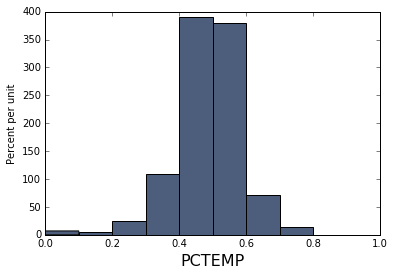

In [6]:
taz_data_norm['PCTEMP']=taz_data_new['EMPRES']/taz_data_new['TOTPOP']
taz_data_norm.select('PCTEMP').hist(bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.], overlay=False, normed=True)

## Adding other normalized variable
**Task - ** Add the following normalized columns to the table. 

Income: (Note for income, we want to normalize by number of households rather than total population.)
* PCTHHINCQ1
* PCTHHINCQ2
* PCTHHINCQ3 
* PCTHHINCQ4

Age:
* PCTAGE0004
* PCTAGE0519
* PCTAGE2044
* PCTAGE4564
* PCTAGE65P

In [ ]:
# Your code here

#Answer key:


## Create histograms of the normalized data, from the histograms find the following:
**Task - ** Create taz_data_norm histograms and use them to answer the following questions:
* About how many TAZs have more than 20% of the population over 65 years old?
* About how many TAZs have a median income less than \$25k in $1989 dollars?
* About how many TAZs have a median income greater than \$75k in 1989 dollars?
* About how many TAZ's have more than 50% employment?



In [ ]:
#Your code here


In [ ]:
#Type your answers here

#  About how many TAZs have more than 20% of the population over 65 years old?

#  About how many TAZs have a median income less than $25k in 1989 dollars?

#  About how many TAZs have a median income greater than $75k in 1989 dollars?

# About how many TAZ's have more than 50% employment?


## Part 2 - Giants Game Impact
### Joining datatables & calculating VHT
Imagine that 5% of the total population of the SF, Oakland, Berkeley, and Mairin area travels to AT&T park (homogeneously, assuming 5% from each TAZ). Compute the **total vehicle hours traveled (VHT)**, assuming every traveller drives alone. You should use the data/sf_oak_traveltimes_bymode.csv from mini-lab 4 to get the expected travel times. 

You can use the Tables.join() function to [join](http://data8.org/datascience/_autosummary/datascience.tables.Table.join.html?highlight=join#datascience.tables.Table.join) the travel_time_data and taz_data tables.

Note that the the Giants stadium is located in TAZ 110, we need to find the travel time from each TAZ to the TAZs with destination = 110.

In [ ]:
travel_time_data = Table.read_table('../minilab4/sf_oak_traveltimes_bymode.csv')

#your code here


In [ ]:
#Your answer here:
# Total VHT = 


### Joining datatables & calculating VMT
With the same scenario as above (5% of the total population of the SF, Oakland, Berkeley, and Mairin area travels to AT&T park (homogeneously, assuming 5% from each TAZ)). Compute the **total vehicle miles traveled (VMT)**, to get to AT&T park assuming every traveler drives alone. The file 'sf_oak_traveldists_bymode.csv' contains the drive alone, shared ride, walk, and bike travel distances from each TAZ in the SF, Oakland, Berkeley, Mairin area to every other TAZ in the area.

In [ ]:
travel_dist_data = Table.read_table('sf_oak_traveldists_bymode.csv')

#your code here


In [ ]:
#Your answer here:

# Total VMT = 
